# **Evaluacion de Ventas de casa con XGBoost**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("Real.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Seleccion de caracteristicas

In [50]:
data1 = data.drop(['X1 transaction date', 'No'], axis=1)
data1.columns = ['Edad de la casa', 'Distancia', 'Numero de tiendas', 'Latitud', 'Longitud', 'Precio Unt']
data1.head()

,Edad de la casa,Distancia,Numero de tiendas,Latitud,Longitud,Precio Unt
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Seleccionar variables de salida y entrada

In [51]:
x = data1.drop('Precio Unt', axis=1)
y = data1['Precio Unt']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Precio Unt, dtype: float64

## Division de de entrenamieto y evaluacion

In [52]:
x_train, x_test, y_train, y_test, = train_test_split(x,y,random_state=1)

In [53]:
x_train.shape, x_test.shape

((310, 5), (104, 5))

In [54]:
model = XGBRegressor()

In [55]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

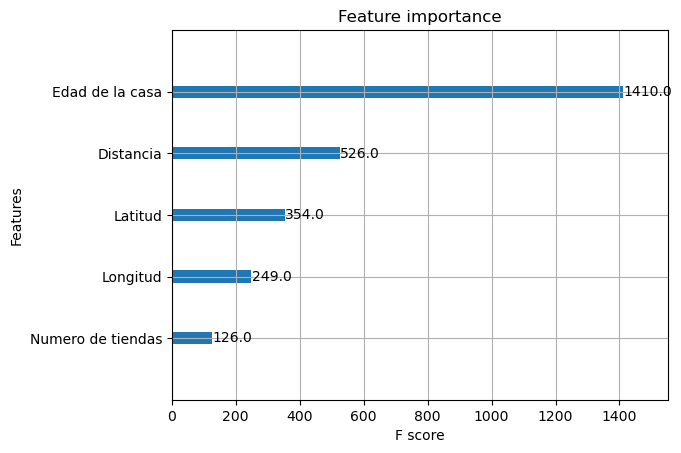

In [61]:
%matplotlib inline
xgb.plot_importance(model, ax=plt.gca())

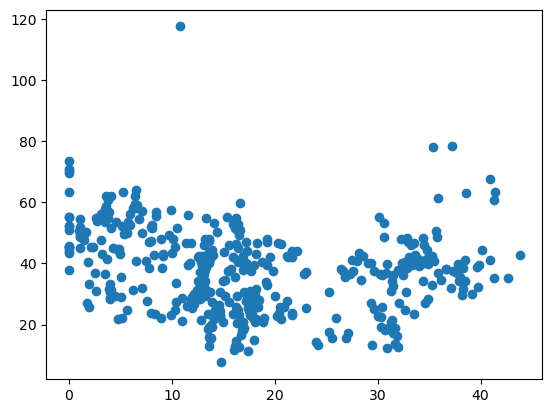

In [63]:
plt.scatter(data1['Edad de la casa'], data1['Precio Unt'])
plt.show()

In [66]:
Prediccion = model.predict(x_test)
Prediccion[1:10]

array([47.643   , 26.308422, 12.965963, 94.14111 , 30.438053, 27.1464  ,
       34.468307, 42.579712, 13.944125], dtype=float32)

## Error del Modelo

#### Error del Modelo de Entrenamiento

In [67]:
pred_train = model.predict(x_train)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
print(r2_score(y_train, pred_train))

0.9915845035963384


In [70]:
print(mean_squared_error(y_train, pred_train))

1.5700161274969948


#### Error del Modelo de Evaluacion

In [71]:
model.score(x_test, y_test)

0.3691885757843456

In [72]:
print(r2_score(y_test, Prediccion))

0.3691885757843456


In [73]:
print(mean_squared_error(y_test, Prediccion))

111.38164298153998
